In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Embedding,LSTM,Conv1D,MaxPooling1D
from keras.datasets import imdb
from keras.utils.data_utils import pad_sequences
from keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt


In [2]:
#데이터를 불러와 학습셋 테스트셋으로 나눈다
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

In [3]:
#단어의 수를 맞춥니다.
X_train = pad_sequences(X_train,maxlen=500)
X_test = pad_sequences(X_test,maxlen=500)

In [4]:
print(X_train.shape[1])
print(X_test.shape[1])

500
500


In [5]:
#모델의 구조를 설정
model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [6]:
#모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [7]:
#학습초기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=3)

In [8]:
#모델을 실행합니다.
history = model.fit(X_train,y_train,batch_size=40,epochs=100,
                    validation_data=(X_test,y_test),callbacks=[early_stopping_callback])

Epoch 1/100
625/625 [==============================] - 19s 27ms/step - loss: 0.3662 - accuracy: 0.8331 - val_loss: 0.2825 - val_accuracy: 0.8820
Epoch 2/100
625/625 [==============================] - 16s 26ms/step - loss: 0.2213 - accuracy: 0.9126 - val_loss: 0.2723 - val_accuracy: 0.8865
Epoch 3/100
625/625 [==============================] - 16s 26ms/step - loss: 0.1612 - accuracy: 0.9382 - val_loss: 0.2839 - val_accuracy: 0.8858
Epoch 4/100
625/625 [==============================] - 16s 25ms/step - loss: 0.1155 - accuracy: 0.9550 - val_loss: 0.3940 - val_accuracy: 0.8811
Epoch 5/100
625/625 [==============================] - 16s 25ms/step - loss: 0.0790 - accuracy: 0.9698 - val_loss: 0.4034 - val_accuracy: 0.8793


In [9]:
#테스트 정확도를 출력합니다.
print('\n Test Accuracy:%.4f'%(model.evaluate(X_test,y_test)[1]))

782/782 [==============================] - 6s 7ms/step - loss: 0.4034 - accuracy: 0.8793

 Test Accuracy:0.8793


In [10]:
#점증셋과 학습셋의 오차를 저장합니다.
y_vloss =history.history['val_loss']

y_loss = history.history['loss']


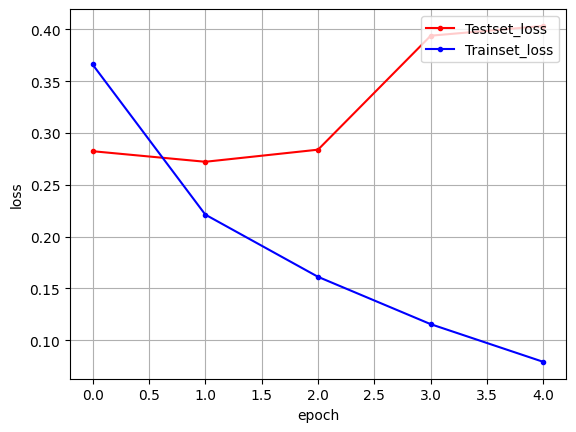

In [11]:
#그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()